In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv


# PREVISÃO DO TIPO DE OBESIDADE

*Este projeto analisa a correlação dos dados, tratamento de dados e modelos de machine learning para prever se uma pessoa está com obesidade, e se estiver, especificar qual o tipo.*

*O objetivo do projeto é entender os modelos de machine learning, qual as métricas utilizadas para classificar o melhor modelo, criar gráficos para visualizar os dados de teste e treino e como escolher as melhores variáveis do dataset para os modelos.*

*O projeto está separado nos seguintes tópicos abaixo:*

***1 - Análise dos agrupamentos***

***2 - Correlação dos dados e seperação dos dados de treino e teste***

***3 - Treino dos modelos e escolha do melhor modelo***

***4 - Conclusão da análise***

In [2]:
# Importação das bibliotecas

# Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de pré processamento e métricas de erros
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Modelos de machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Remover os avisos
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importação do dataset
df = pd.read_csv('/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Quantidade de linhas e colunas presentes no dataset (2111 linhas e 17 colunas)
df.shape

(2111, 17)

In [5]:
# 5 últimas linhas do dataset
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.47,yes,yes,3.0,3.0,Sometimes,no,2.86,no,1.03,0.714,Sometimes,Public_Transportation,Obesity_Type_III


# Análise dos agrupamentos

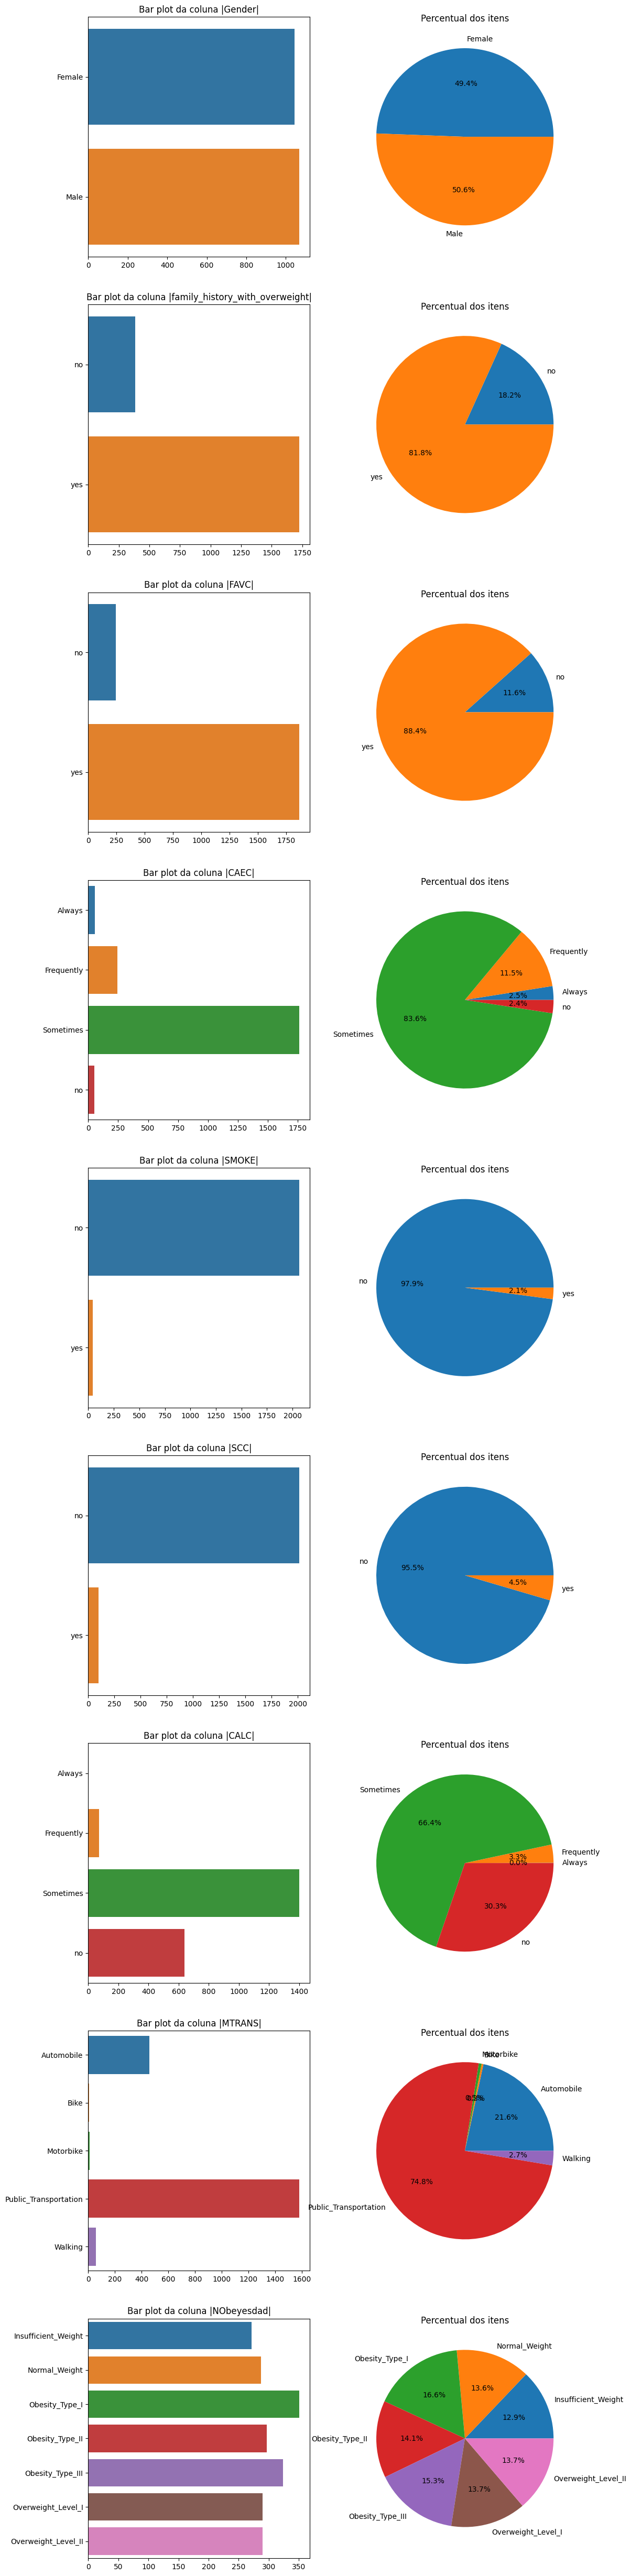

In [6]:
# Análise gráfica da quantidade de itens por coluna e o percentual
colunas_categoricas = df.select_dtypes(include = 'object').columns

fig, axs = plt.subplots(len(colunas_categoricas), 2, figsize = (12, 7 * len(colunas_categoricas)))

i = 0
for col in colunas_categoricas:
    agrupamento = df.groupby(col).size().reset_index(name = 'Quantidade')
    sns.barplot(x = agrupamento['Quantidade'].values, y = agrupamento[col].values, ax = axs[i][0])
    axs[i][0].set_title(f'Bar plot da coluna |{col}|')
    axs[i][1].pie(agrupamento['Quantidade'].values, labels = agrupamento[col].values, autopct = '%1.1f%%')
    axs[i][1].set_title('Percentual dos itens')
    i += 1
plt.show()

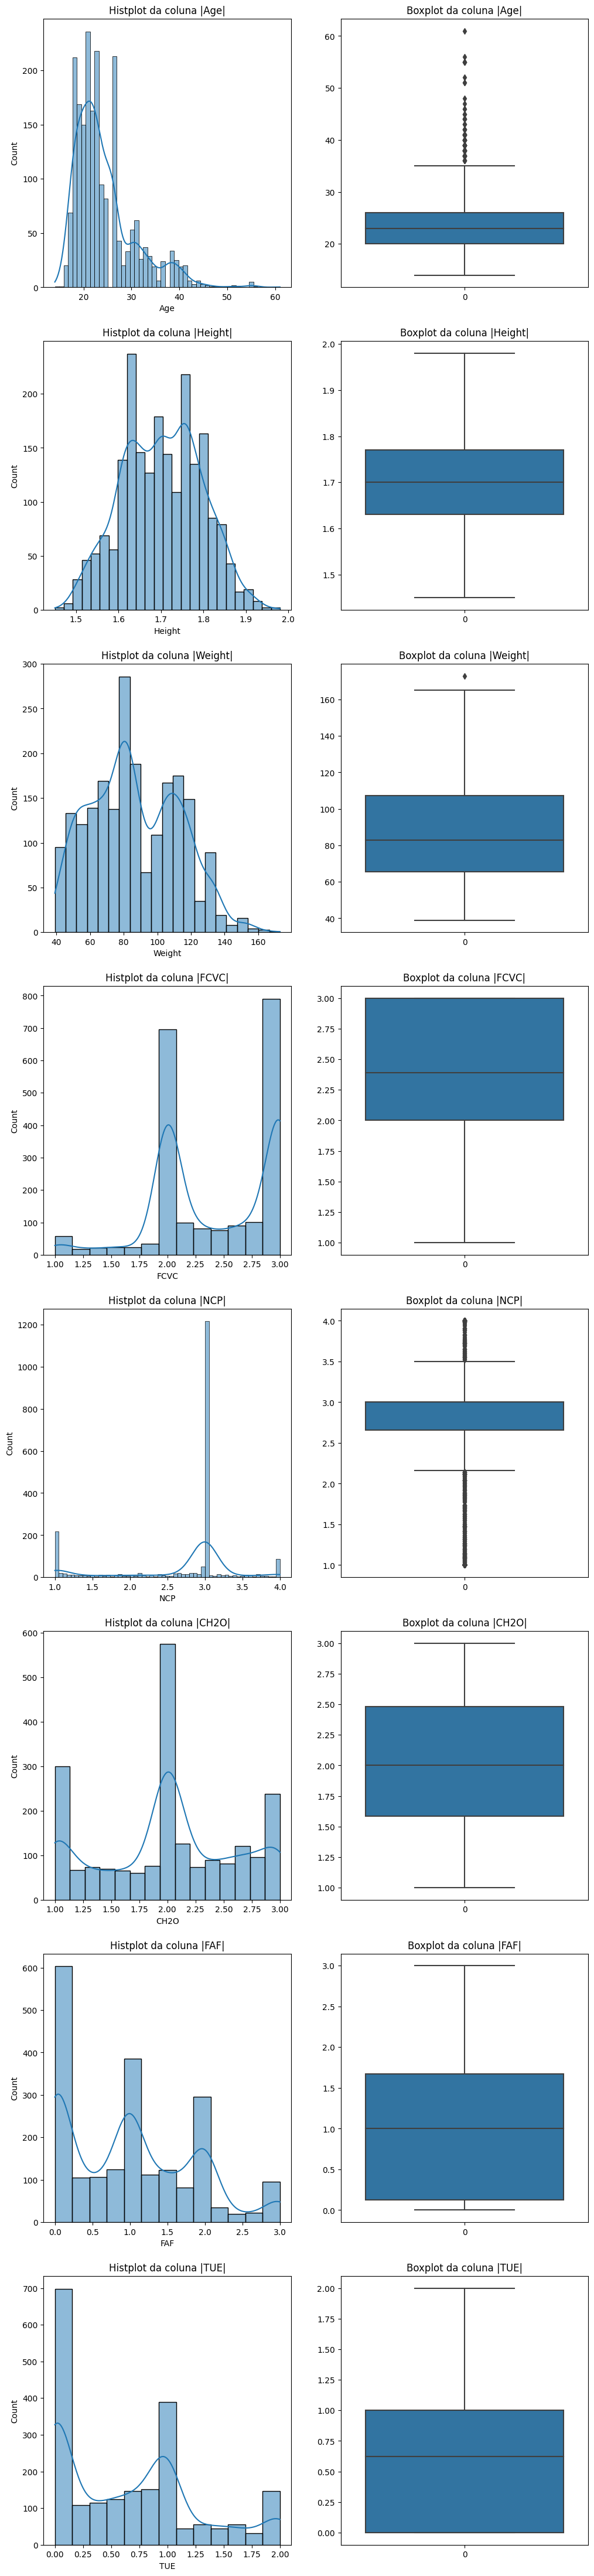

In [7]:
# Verificando a distribuição dos dados atráves dos gráficos do histplot e boxplot
colunas_numericas = df.select_dtypes(exclude = 'object').columns

fig, axs = plt.subplots(len(colunas_numericas), 2, figsize = (12, 7 * len(colunas_numericas)))

for i, col in enumerate(colunas_numericas):
    sns.histplot(df[col], ax = axs[i][0], kde = True)
    axs[i][0].set_title(f'Histplot da coluna |{col}|')
    sns.boxplot(df[col], ax = axs[i][1])
    axs[i][1].set_title(f'Boxplot da coluna |{col}|')

plt.show()

In [8]:
# Verificando os tipos de dados, se tem valores nulos e a quantidade de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
# Verificando novamente se tem valores nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
# Analise das variáveis númericas de acordo com o valor máximo, mínimo, quantidade e quartis
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Correlação dos dados e seperação dos dados de treino e teste

In [11]:
# Criando uma cópia do dataset que vai ser usado nos modelos de machine learning
df_copia = df.copy()

In [12]:
# Transformação das variáveis categóricas em númericas
for col in df_copia.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    df_copia[col] = le.fit_transform(df_copia[col])

# Verificando os números de cada tipo de obesidade
mapeamento = {classe: idx for idx, classe in enumerate(le.classes_)}
mapeamento

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 2,
 'Obesity_Type_II': 3,
 'Obesity_Type_III': 4,
 'Overweight_Level_I': 5,
 'Overweight_Level_II': 6}

<Axes: >

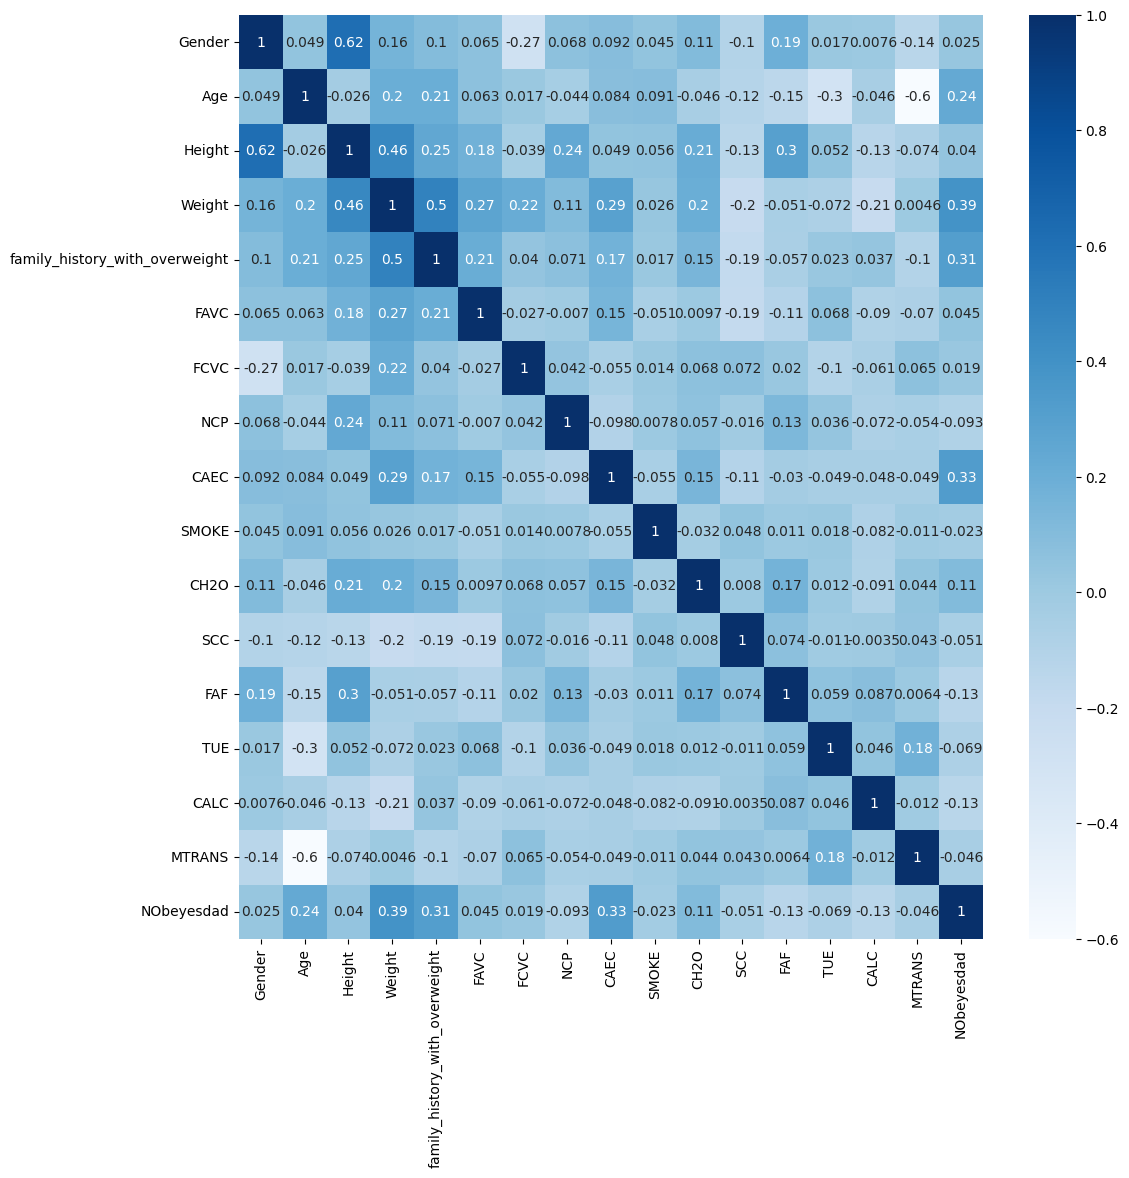

In [13]:
# Verificando a correlação dos dados
plt.figure(figsize = (12,12))
corr = df_copia.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

# Treino dos modelos e escolha do melhor modelo

In [14]:
# Separação das variáveis dependentes e independentes
X = df_copia.drop('NObeyesdad',axis = 1)
X = X.values
y = df_copia.iloc[:,-1].values

In [15]:
# Separação das variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
modelos_accuracy = []
modelos_nomes = ['Árvore de Decisão', 'Random Forest', 'KNN', 'Suport Vector', 'Gaussian', 'Regressão Logistica', 'Gradient Boosting']
modelos = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), LogisticRegression(), GradientBoostingClassifier()]

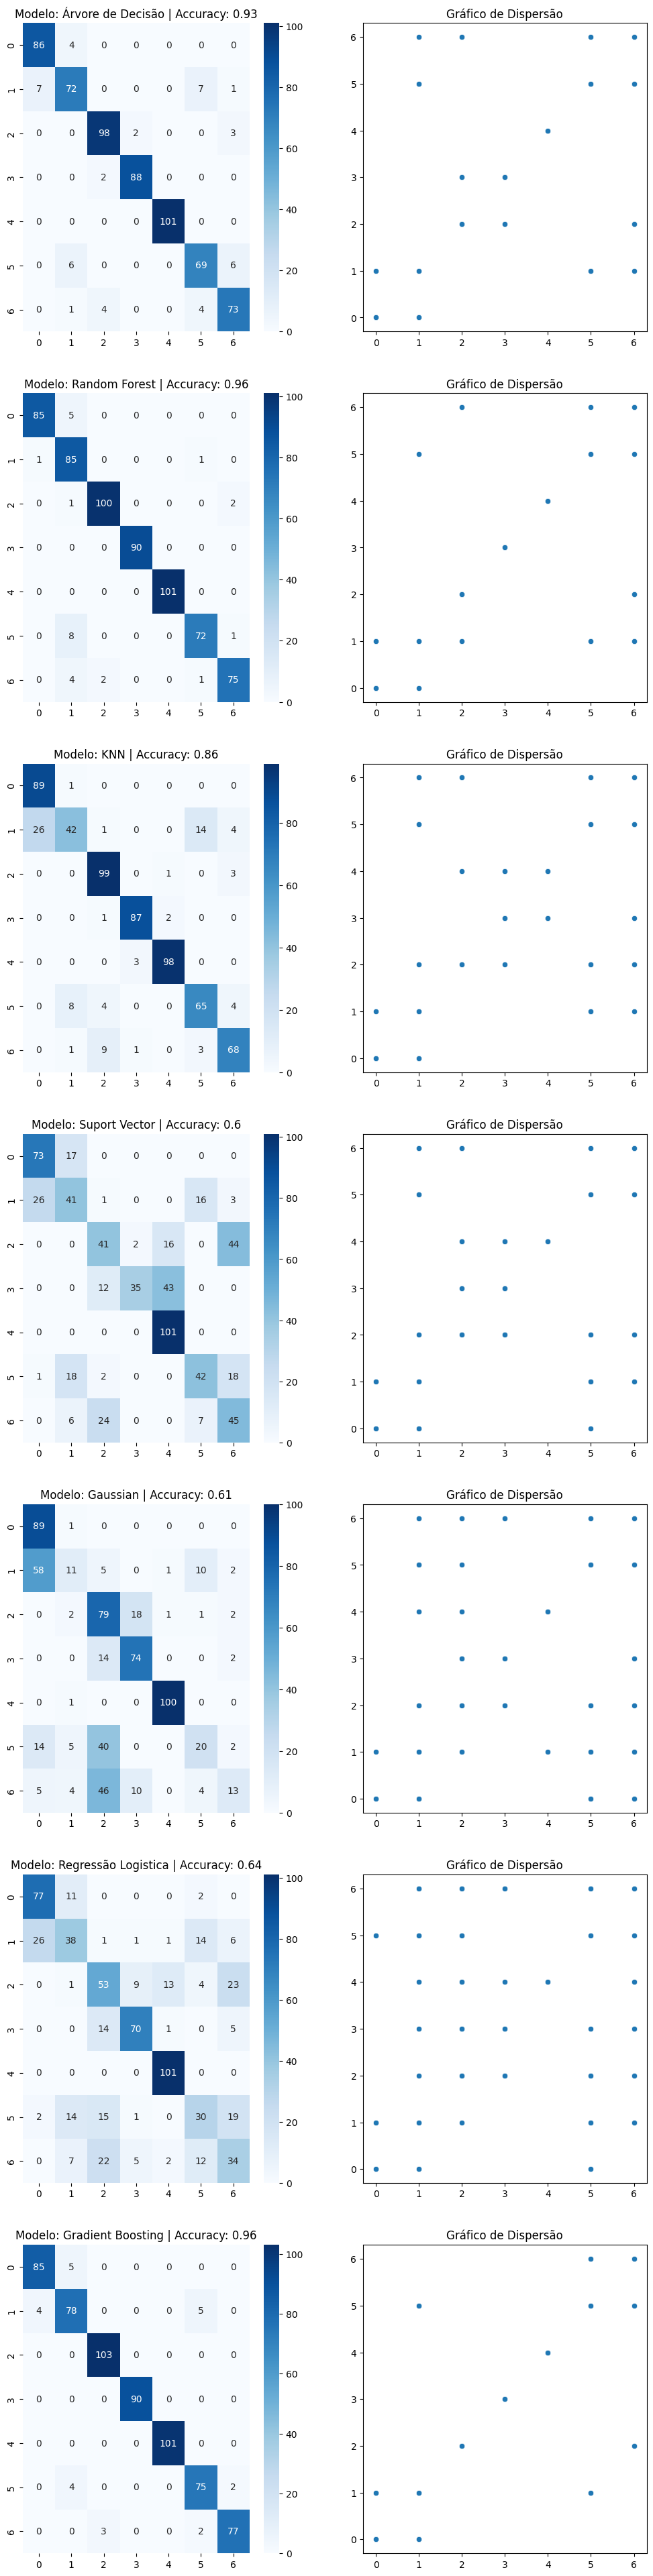

In [17]:
# Treino dos modelos e visualização da matrix de confusão para verificar os erros e acertos dos modelos
# Visualização do gráfico de dispersão de cada modelo treinado
# Cálculo da accuracy para determinar qual o melhor modelo de machine learning para este projeto
fig, axs = plt.subplots(len(modelos), 2, figsize = (12, 7 * len(modelos)))
i = 0
for model in range(len(modelos)):
    modelos[model].fit(X_train, y_train)
    y_pred = modelos[model].predict(X_test)
    matrix_confusao = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix_confusao, cmap = 'Blues', fmt = 'd', annot = True, ax = axs[i][0])
    sns.scatterplot(x = y_test, y = y_pred, ax = axs[i][1])
    axs[i][0].set_title(f'Modelo: {modelos_nomes[model]} | Accuracy: {round(accuracy_score(y_test, y_pred),2)}')
    modelos_accuracy.append(accuracy_score(y_test, y_pred))
    axs[i][1].set_title('Gráfico de Dispersão')
    i += 1
    
plt.show()

# Conclusão da análise

*Após os treinos de cada modelo de machine learning, visualização das métricas de erros e os gráficos da matrix de confusão e dispersão, chegamos a conclusão de que o melhor modelo é o Gradient Boosting com accuracy de 0.96 e com bastantes acertos na matrix de confusão, conseguindo erros pequenos e classificando bem os tipos de obesidade, além disso, seu gráfico de dispersão apresenta certa linearidade dos dados, tendo em vista que estão bem agrupados*

*Uma maneira de melhorar a accuracy é colocar hiper parâmetros no modelo de Gradient Boosting ou no Random Forest que apresenta accuracy semelhante*